In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy as sc
import copy
import matplotlib.gridspec as gridspec

In [29]:
def initializesquare(R):
    grid = np.zeros((2*R + 1, 2*R+ 1))
    #initialize square potential
    a = int(4/5 * R)
    b = int(6/5 * R)
    for x in range(a,b+1):
        grid[a][x] = 1
        grid[b][x] = 1
        grid[x][a] = 1
        grid[x][b]= 1
    grid[:,0] = 2
    grid[0,:] = 1
    firstgrid = copy.deepcopy(grid)
    
    mask = grid.astype(bool)
    mask[0,:] = True
    mask[:,0] = True
    mask[2*R,:] = True
    mask[:,2*R] = True

    return grid, mask

In [30]:
def relaxgrid(grid, mask):
    (i,j) = np.where(~mask)
    maxchange = np.inf
    N = 0
    while(maxchange > .01):
        N += 1
        maxchange = 0
        beforegrid = copy.deepcopy(grid)
        grid[i,j] = (grid[i+1,j] + grid[i-1,j] + grid[i,j+1] + grid[i,j-1])/4
        np.seterr(divide = 'ignore')
        np.seterr(divide='ignore', invalid='ignore')
        fracchange = abs(beforegrid - grid) / beforegrid
        maxchange = np.nanmax(fracchange)
    return grid, N

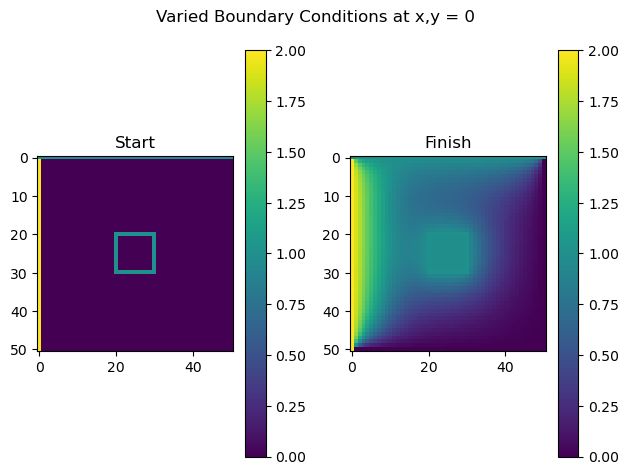

In [39]:
startgrid, mask = initializesquare(25)
grid = copy.deepcopy(startgrid)
endgrid, N25 = relaxgrid(grid, mask)

gs = gridspec.GridSpec(1,2)

pl.figure()
pl.suptitle("Varied Boundary Conditions at x,y = 0")

ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.imshow(startgrid)
pl.colorbar()
pl.title("Start")

ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.imshow(endgrid)
pl.colorbar()
pl.title("Finish")
plt.tight_layout()
